In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('output.csv')
df['cap_ratio'] = df['cap_ratio'].apply(lambda x: float(x.strip('[]')) if isinstance(x, str) else x)
df['imp_ratio'] = df['imp_ratio'].apply(lambda x: float(x.strip('[]')) if isinstance(x, str) else x)
df.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
df['soh']=df['cap_ratio']/2+ df['imp_ratio']/2
df.head()

,cycle,time_charge,time_discharge,Discharge voltage_measured,Discharge current_measured,Charging Voltage,Charging Current,Power Out,Power In,Temp Discharge,Temp Charge,Output Energy,Input Energy,cap_ratio,imp_ratio,soh
0,1,10289.312,3591.734,3.552038,-1.855346,4.079851,0.941164,6.629801,3.800934,35.208398,24.959154,23797.592119,26642.736309,1.000000,1.000000,1.000000
1,2,10283.078,3552.297,3.552567,-1.874700,4.057904,0.961287,6.697785,3.850354,36.348993,25.413968,23797.696584,27359.989409,1.000212,0.986952,0.993582
2,3,10281.390,3531.578,3.556794,-1.873827,4.056384,0.963212,6.697810,3.856286,35.857118,25.126172,23666.577683,27345.396909,0.994126,0.976719,0.985423
3,4,10081.797,3492.907,3.561410,-1.883194,4.058279,0.969751,6.733348,3.887255,35.775393,24.757206,23539.487839,27153.281627,0.988498,0.985876,0.987187
4,5,10797.328,3511.594,3.556611,-1.873239,4.065739,0.931057,6.693233,3.736190,35.492816,24.374805,23514.714733,26913.835643,0.988136,0.976527,0.982332


In [4]:
df['battery_id'] = (df['cycle'] == 1).cumsum()
df = df.sort_values(by=['battery_id', 'cycle']).reset_index(drop=True)
df.head()

,cycle,time_charge,time_discharge,Discharge voltage_measured,Discharge current_measured,Charging Voltage,Charging Current,Power Out,Power In,Temp Discharge,Temp Charge,Output Energy,Input Energy,cap_ratio,imp_ratio,soh,battery_id
0,1,10289.312,3591.734,3.552038,-1.855346,4.079851,0.941164,6.629801,3.800934,35.208398,24.959154,23797.592119,26642.736309,1.000000,1.000000,1.000000,1
1,2,10283.078,3552.297,3.552567,-1.874700,4.057904,0.961287,6.697785,3.850354,36.348993,25.413968,23797.696584,27359.989409,1.000212,0.986952,0.993582,1
2,3,10281.390,3531.578,3.556794,-1.873827,4.056384,0.963212,6.697810,3.856286,35.857118,25.126172,23666.577683,27345.396909,0.994126,0.976719,0.985423,1
3,4,10081.797,3492.907,3.561410,-1.883194,4.058279,0.969751,6.733348,3.887255,35.775393,24.757206,23539.487839,27153.281627,0.988498,0.985876,0.987187,1
4,5,10797.328,3511.594,3.556611,-1.873239,4.065739,0.931057,6.693233,3.736190,35.492816,24.374805,23514.714733,26913.835643,0.988136,0.976527,0.982332,1


In [5]:
SOH_THRESHOLD = 0.7

# Calculate RUL based on the expected SOH decay
# Assuming a linear decline, this is a simplistic way to estimate remaining cycles
# You might need a better model based on your data or expert knowledge
df['RUL'] = df.groupby('battery_id').apply(
    lambda group: group['soh'].apply(lambda soh: max(0, (soh - SOH_THRESHOLD) * 100))
).reset_index(drop=True)

df.head()

C:\Users\anasm\AppData\Local\Temp\ipykernel_19368\764929379.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['RUL'] = df.groupby('battery_id').apply(


,cycle,time_charge,time_discharge,Discharge voltage_measured,Discharge current_measured,Charging Voltage,Charging Current,Power Out,Power In,Temp Discharge,Temp Charge,Output Energy,Input Energy,cap_ratio,imp_ratio,soh,battery_id,RUL
0,1,10289.312,3591.734,3.552038,-1.855346,4.079851,0.941164,6.629801,3.800934,35.208398,24.959154,23797.592119,26642.736309,1.000000,1.000000,1.000000,1,30.000000
1,2,10283.078,3552.297,3.552567,-1.874700,4.057904,0.961287,6.697785,3.850354,36.348993,25.413968,23797.696584,27359.989409,1.000212,0.986952,0.993582,1,29.358210
2,3,10281.390,3531.578,3.556794,-1.873827,4.056384,0.963212,6.697810,3.856286,35.857118,25.126172,23666.577683,27345.396909,0.994126,0.976719,0.985423,1,28.542257
3,4,10081.797,3492.907,3.561410,-1.883194,4.058279,0.969751,6.733348,3.887255,35.775393,24.757206,23539.487839,27153.281627,0.988498,0.985876,0.987187,1,28.718658
4,5,10797.328,3511.594,3.556611,-1.873239,4.065739,0.931057,6.693233,3.736190,35.492816,24.374805,23514.714733,26913.835643,0.988136,0.976527,0.982332,1,28.233165


In [6]:
df.drop(columns=['soh', 'cap_ratio', 'imp_ratio'], inplace=True)
df.head()

,cycle,time_charge,time_discharge,Discharge voltage_measured,Discharge current_measured,Charging Voltage,Charging Current,Power Out,Power In,Temp Discharge,Temp Charge,Output Energy,Input Energy,battery_id,RUL
0,1,10289.312,3591.734,3.552038,-1.855346,4.079851,0.941164,6.629801,3.800934,35.208398,24.959154,23797.592119,26642.736309,1,30.000000
1,2,10283.078,3552.297,3.552567,-1.874700,4.057904,0.961287,6.697785,3.850354,36.348993,25.413968,23797.696584,27359.989409,1,29.358210
2,3,10281.390,3531.578,3.556794,-1.873827,4.056384,0.963212,6.697810,3.856286,35.857118,25.126172,23666.577683,27345.396909,1,28.542257
3,4,10081.797,3492.907,3.561410,-1.883194,4.058279,0.969751,6.733348,3.887255,35.775393,24.757206,23539.487839,27153.281627,1,28.718658
4,5,10797.328,3511.594,3.556611,-1.873239,4.065739,0.931057,6.693233,3.736190,35.492816,24.374805,23514.714733,26913.835643,1,28.233165


In [7]:
df.drop(columns=['battery_id'], inplace=True)

In [8]:
# creating a feature called "efficiency" measuring the conversion efficiency of total stored energy to useful work
df['Efficiency']=df['Output Energy']/df['Input Energy']
# dropping the above two column as we have used them to create a new feature
df.drop(columns=['Output Energy', 'Input Energy'], inplace=True)

# creating a feature
df['time_ratio']=df['time_charge']/df['time_discharge']
df.drop(columns=['time_charge', 'time_discharge'], inplace=True)

# creating a feature called "power_efficiency" measuring the efficiency of average 
# looking very similar to "efficiency"
df['power_efficiency'] = df['Power Out']/df['Power In']
df.drop(columns=['Power Out', 'Power In'], inplace=True)

# creating feature res_ch and res_dc
df['res_ch'] = df['Charging Voltage'] / df['Charging Current']
df['res_dc'] = df['Discharge voltage_measured'] / df['Discharge current_measured']
# dropping the above two features
df.drop(columns=['Charging Voltage', 'Charging Current', 'Discharge voltage_measured', 'Discharge current_measured'], inplace=True)

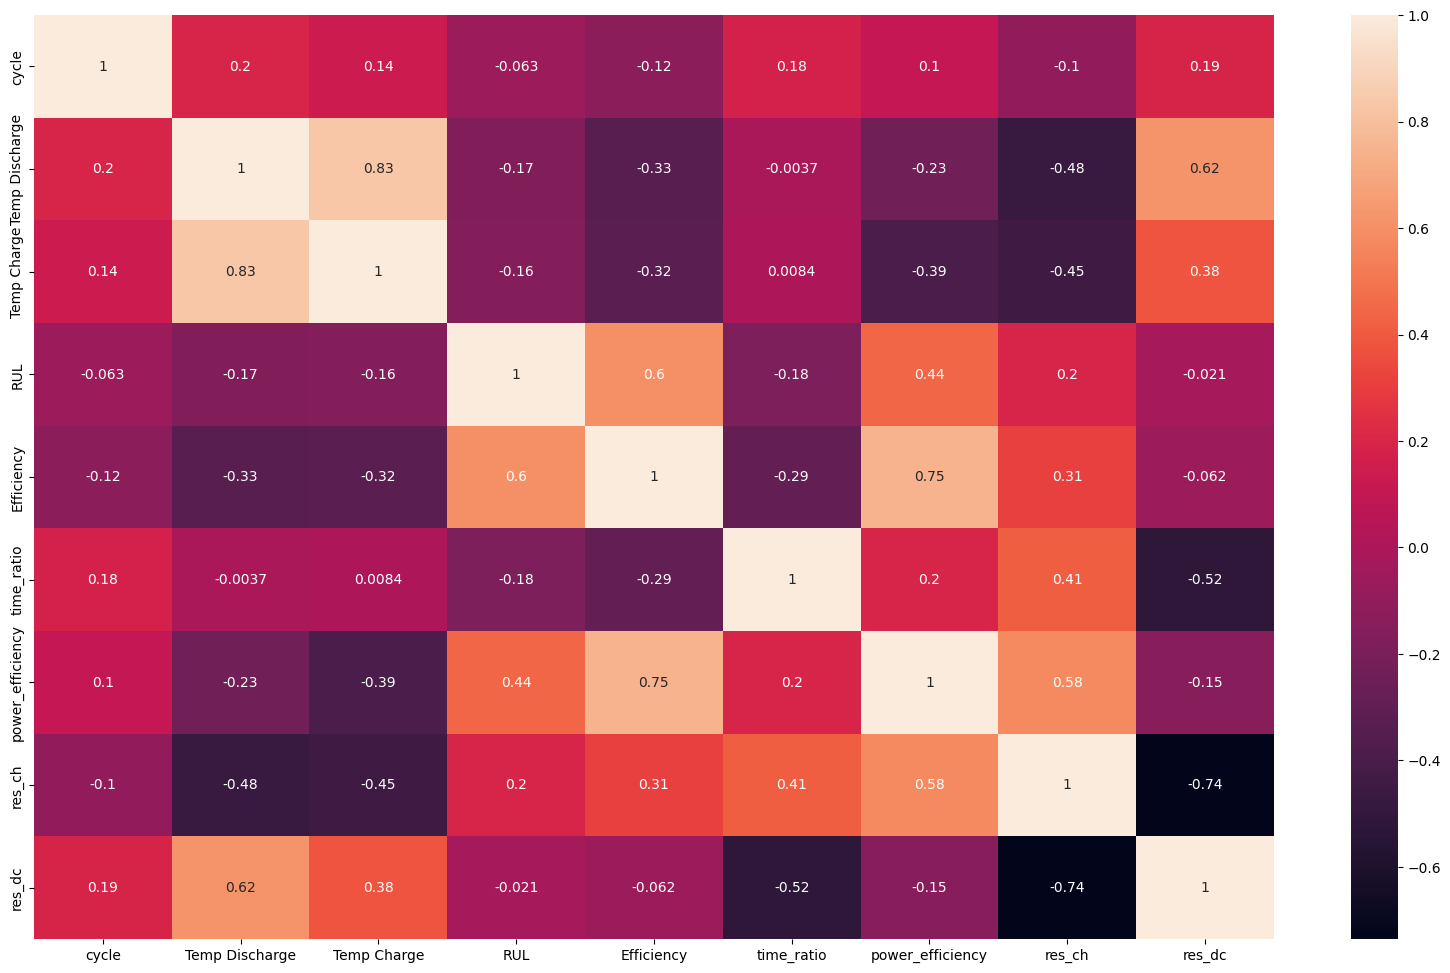

In [9]:
# plotting a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [10]:
X=df.drop(columns=['RUL'])
y=df['RUL']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [12]:
X.columns

Index(['cycle', 'Temp Discharge', 'Temp Charge', 'Efficiency', 'time_ratio',
       'power_efficiency', 'res_ch', 'res_dc'],
      dtype='object')

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(restore_best_weights=True, monitor='loss', patience=10)

In [15]:
X_test.shape

(46, 8)

In [16]:
model=Sequential()
model.add(Dense(units=16, activation='relu', input_dim=8))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

c:\Users\anasm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.fit(X_train, y_train, epochs=2000, callbacks=early_stopping)

Epoch 1/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1954.7830
Epoch 2/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9139.7227
Epoch 3/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3726.3142
Epoch 4/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4351.1177
Epoch 5/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3202.4543
Epoch 6/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1947.0854
Epoch 7/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 4351.3813
Epoch 8/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - loss: 12820.8320
Epoch 9/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 3719.9204
Epoch 10/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1609.3556
Epoch 11/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2314.2739
Epoch 12/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7244.8574
Epoch 13/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6018.9634
Epoch 14/2000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1595.0577
Epoch 15

In [18]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred_ann=model.predict(X_test)
print(mean_squared_error(y_pred_ann, y_test))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
52.168003763459026


In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [24]:
# Define the model
rf = RandomForestRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           cv=5,  # 5-fold cross-validation
                           n_jobs=-1,  # Use all available cores
                           verbose=1,   # Print progress
                           scoring='neg_mean_squared_error')  # Choose the scoring metric

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters: ", grid_search.best_params_)

# Predict on the test set with the best model
y_pred_rf = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
mse = mean_absolute_error(y_test, y_pred_rf)
print(f'Mean Absolute Error: {mse}')

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Mean Squared Error: 1.404754180507662


c:\Users\anasm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
259 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\anasm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\anasm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\anasm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\bas

In [25]:
# Define the model
xg = XGBRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],            # Number of trees in the ensemble
    'max_depth': [3, 5, 7, 9],                 # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2],         # Step size shrinkage used to prevent overfitting
    'subsample': [0.6, 0.8, 1.0],              # Proportion of samples used for fitting individual base learners
    'colsample_bytree': [0.6, 0.8, 1.0],       # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2, 0.3],                # Minimum loss reduction required to make a further partition
}

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=xg, 
                           param_grid=param_grid, 
                           cv=5,  # 5-fold cross-validation
                           n_jobs=-1,  # Use all available cores
                           verbose=1,   # Print progress
                           scoring='neg_mean_squared_error')  # Choose the scoring metric

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters: ", grid_search.best_params_)

# Predict on the test set with the best model
y_pred_xg = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
mse = mean_absolute_error(y_test, y_pred_xg)
print(f'Mean absolute Error: {mse}')

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


c:\Users\anasm\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters:  {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200, 'subsample': 1.0}
Mean Squared Error: 1.2295650308705206


In [29]:
import numpy as np
for i in range(20):
    print(np.array(y_test)[i], y_pred_xg[i])

27.904361000000012 28.100557
25.855246500000007 26.47141
32.47196750000001 29.319452
28.159888500000008 28.714848
25.7138015 25.747639
18.30791300000001 17.760166
19.76025950000001 18.981205
22.145197000000017 22.445858
27.755843499999997 26.558527
26.626807000000007 27.158537
27.824673 27.923952
22.309274999999996 21.319353
24.870091000000006 26.885584
30.780597499999995 31.08472
28.450020500000008 28.785404
28.21791600000001 28.207546
23.280622500000003 23.488487
21.536102 21.162823
29.633278499999992 29.435114
27.720009 27.909023


In [30]:
mean_absolute_error(y_test, y_pred_rf)

1.404754180507662